In [50]:
from plotting.plot_2d import plot_grad_descent_2d
from grad_descent_test import grad_descent_test
from function_generation.PolynomialGenerator import PolynomialGenerator
import numpy as np
from line_searches.QuasiWolfeTest2 import QuasiWolfeTest2
from line_searches.StrongWolfe import StrongWolfe
from line_searches.Constant import Constant
import matplotlib.pyplot as plt

In [51]:
dimensions = 2

f,g, h = PolynomialGenerator().generate(dimensions,5)
x0 = np.random.uniform(-1,1,(dimensions))

In [52]:

quasi_wolfe_ls = QuasiWolfeTest2(alpha0=0.4, eta_w=0.1)
wolfe_ls = StrongWolfe(alpha0=1)

constraints = [-1,1]
# print(constraints)
#
res = grad_descent_test(f,g,x0,learning_rate=QuasiWolfeTest2(), termination_criteria='x star',record_trace=True, constraints=constraints, max_steps=4, x_star=np.array([0,0]), verbose=True)

print(f" number of steps {res[1]}")
print(f" number of stage one tries {res[5]}")
print(f" number of stage two currents {res[6]}")
print(f" number of brackets {len(res[7])}")


found wolfe
 next_x [0.51200979 2.39881004] insed GD
 next_x clipped [0.51200979 1.        ] insed GD
step 0 
x: [-0.25048235  0.83588575]
 y: -0.1700771262328632 
grad: [-1.19139398 -2.44206921] 
next_x: [0.51200979 1.        ]
 next_x [0.41582518 1.        ] insed GD
 next_x clipped [0.41582518 1.        ] insed GD
step 1 
x: [0.51200979 1.        ]
 y: -1.4452727986823726 
grad: [0.48279848 0.        ] 
next_x: [0.41582518 1.        ]
 next_x [0.41583144 1.        ] insed GD
 next_x clipped [0.41583144 1.        ] insed GD
step 2 
x: [0.41582518 1.        ]
 y: -1.4680310719702556 
grad: [-2.96161573e-05  0.00000000e+00] 
next_x: [0.41583144 1.        ]
 error in stage two 
 next_x [0.41583144 1.        ] insed GD
 next_x clipped [0.41583144 1.        ] insed GD
step 3 
x: [0.41583144 1.        ]
 y: -1.468031072062949 
grad: [-9.01982933e-11  0.00000000e+00] 
next_x: [0.41583144 1.        ]
 error in stage two 
 next_x [0.41583144 1.        ] insed GD
 next_x clipped [0.41583144 1.

In [53]:
for params in res[-1]:
    print(f" x {params[0]}, next_x, {params[1]} grad {params[2]}, alpha {params[3]}, step count {params[4]}")

 x [-0.25048235  0.83588575], next_x, [0.51200979 1.        ] grad [-1.19139398 -2.44206921], alpha 0.64, step count 0
 x [0.51200979 1.        ], next_x, [0.41582518 1.        ] grad [0.48279848 0.        ], alpha 0.19922311147708804, step count 1
 x [0.41582518 1.        ], next_x, [0.41583144 1.        ] grad [-2.96161573e-05  0.00000000e+00], alpha 0.21135819690071211, step count 2
 x [0.41583144 1.        ], next_x, [0.41583144 1.        ] grad [-9.01982933e-11  0.00000000e+00], alpha 0.019090131409917617, step count 3
 x [0.41583144 1.        ], next_x, [0.41583144 1.        ] grad [-8.20514767e-11  0.00000000e+00], alpha 0.019090131060545183, step count 4


In [54]:
print(np.array([0.32801201, 0.1962417 ])- 1.2929607978227242*np.array([-0.18466457 , 0.92519565]))

[ 0.56677606 -1.00000001]


In [55]:
print(f" number of brackets {len(res[7])}")
print(res[7])


 number of brackets 4
[[[0.43476204 1.        ]
  [0.35751428 1.        ]]

 [[0.41582992 1.        ]
  [0.41583466 1.        ]]

 [[0.41583144 1.        ]
  [0.41583144 1.        ]]

 [[0.41583144 1.        ]
  [0.41583144 1.        ]]]


In [56]:
print(f" steps {res[0]}")

 steps [[-0.25048235  0.83588575]
 [ 0.51200979  1.        ]
 [ 0.41582518  1.        ]
 [ 0.41583144  1.        ]
 [ 0.41583144  1.        ]]


In [57]:
print(res[7][0])

[[0.43476204 1.        ]
 [0.35751428 1.        ]]


 number of steps 4


Text(0, 0.5, 'y')

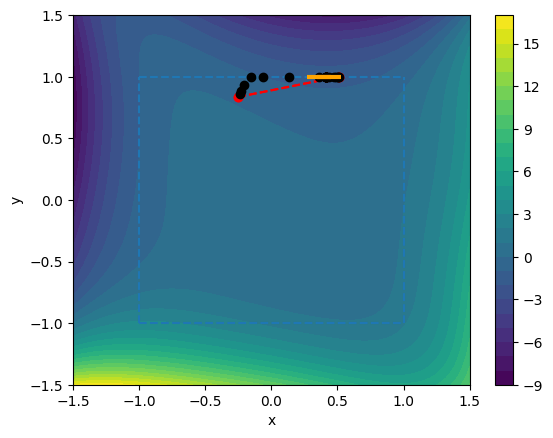

In [58]:
# plot the steps and tries of gradient descent
bounds =[-1,1]
margin = 0.5
samples_per_side = 100
levels = 30

steps = res[0]
print(f" number of steps {res[1]}")
stage_one_tries = res[5]
stage_two_currents = res[6]
stage_two_brackets = res[7][0]


st =1
sot = 1
stc = 0
stb = 1
bracket_id1 = 0
bracket_id2 = 1



bounds_x = bounds
bounds_y = bounds

x = np.linspace(bounds_x[0] - margin, bounds_x[1] + margin, samples_per_side)
y = np.linspace(bounds_y[0] - margin, bounds_y[1] + margin, samples_per_side)

# create a matplotlip contour plot of the function around its minimum
xv, yv = np.meshgrid(x, y)
stacked = np.stack((xv, yv), axis=2)
ys = np.apply_along_axis(f, 2, stacked)
fig, axes = plt.subplots()

plt.hlines(np.array([bounds_y[0], bounds_y[1]]), xmin=(bounds_x[0]), xmax=bounds_x[1],
           linestyles='dashed')
plt.vlines(np.array([bounds_x[0], bounds_x[1]]), ymin=(bounds_y[0]), ymax=bounds_y[1],
           linestyles='dashed')
# plt.hlines(np.array([1]), xmin=(-0.78654493), xmax=-0.23811257,
#            linestyles='dashed', colors='orange')

contours = axes.contourf(x, y, ys, levels)
fig.colorbar(contours, ax=axes, orientation='vertical',
             location='right', shrink=1)
if st:
    axes.plot(steps[:, 0], steps[:, 1], 'ro')
    axes.plot(steps[:, 0], steps[:, 1], 'r--')

    axes.plot(steps[:, 0], steps[:, 1], 'ro')
    axes.plot(steps[:, 0], steps[:, 1], 'r--')


if sot:
    axes.scatter(stage_one_tries[:, 0], stage_one_tries[:, 1], c='black', zorder=10)
    # axes.plot(stage_one_tries[:, 0], stage_one_tries[:, 1], 'black --')

if stc:
    axes.scatter(stage_two_currents[:, 0], stage_two_currents[:, 1], c='orange', zorder=10, marker='|')
    # axes.plot(stage_two_currents[:, 0], stage_two_currents[:, 1], 'green --')

if stb:
    # axes.plot(stage_two_brackets[bracket_id][:, 0], stage_two_brackets[bracket_id][:, 1], c='green', ls='--')
    axes.scatter(stage_two_brackets[bracket_id1][ 0], stage_two_brackets[bracket_id1][ 1],
                 c='orange', marker='_', zorder=20, s=300, lw=3)
    axes.scatter(stage_two_brackets[bracket_id2][0], stage_two_brackets[bracket_id2][1],
                 c='orange', marker='_', zorder=20, s=300, lw=3)

# axes.scatter([ 0.56677606], [-1.00000001], c='orange', zorder=20)
axes.set_xlabel('x')
axes.set_ylabel('y')



In [59]:
# print(stage_two_brackets[bracket_id][:, 0])

In [60]:
print(x0)

[-0.25048235  0.83588575]
